<a href="https://colab.research.google.com/github/gabrielmercado90/Toxicidad-en-el-agua-de-los-peces/blob/Master/Miniproyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import os

In [ ]:
os.chdir("/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/miniproyecto1")
data = pd.read_excel("mini.xlsx")
data.head(10)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
0,326,829,1676,0,1,1453,3770
1,2189,58,863,0,0,1348,3115
2,2125,638,831,0,0,1348,3531
3,3027,331,1472,1,0,1807,3510
4,2094,827,86,0,0,1886,5390
5,3222,331,2177,0,0,706,1819
6,3179,0,1063,0,0,2942,3947
7,3,0,938,1,0,2851,3513
8,262,499,99,0,0,2942,4402
9,2834,134,95,0,0,1591,3021


In [ ]:
x_train = np.zeros((908,6))
for i in range(908):
  for j in range(6):
     x_train[i,j] = data.iloc[i,j]

y_train = data['quantitative response, LC50 [-LOG(mol/L)]'].values

print(y_train)

[3770 3115 3531 3510 5390 1819 3947 3513 4402 3021 3210 2371 3919 3030
 2736 2157 2413  898  450 3733 2976 6535 5643 4629 4838 4081 3436 3450
 1102 4257 5386 3393 1308 3554 2269 4165 5896 4829 4590 2092 3665 3560
 4805 3174 7899 2670 4016 3857 5522 4851 3840 4586 5284 3559 4091 4330
 3755 4552 3620 4459 2827 6380 4786 3861 3262 6297 3546 2920 3203 2283
 1559 3470 4748 2576 5259 4564 4370   53 2381 2891 1088 3721 3701 6083
 4628 3700 1842 3396 2990 3573 2271 2085 3822 3290 3840 3979 3470 3314
 4031 4740 4194 3447 2364 3645 2070 2270 3513 2811 2832 1639 2016 1651
 4097 3123 3231 5052 3572 2436 2567 1795 5072 2156 1037 1932 2505 1524
 3048 5115 2856 4366 4976 2940 4538 3391 2692 3825 3206 1780  533 3299
 2914 1180 3168 3446 3496 4680 3252 2980 3936 5470 1842  150 3736 3719
 1749 3507 3979 5363 4396 3984 1020 2973 3182 5055 4822  330 4819 5219
 5268 3139 2858 4191 4416 3537 4380 1408 2936 8471 5861 5574 3852 5244
 2548 5276 3924 6379 4705 4960 3766 3641 4108 4420 5290 2392 3870 5642
 4287 

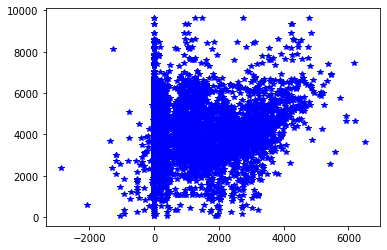

In [ ]:
plt.figure()
plt.plot(x_train, y_train, '*b')

In [ ]:
def normalized(x,xmax,xmin):
  y= 2*((x - xmin)/(xmax-xmin))-1
  return y

def normalized2(x,xmax,xmin):
  y= 1*((x - xmin)/(xmax-xmin))
  return y

In [ ]:
x_train2 = normalized(x_train,np.max(x_train),np.min(x_train))
y_train2 = normalized2(y_train,np.max(y_train),np.min(y_train))
print(x_train2)
print(y_train2)

[[-0.31694861 -0.20991595 -0.02968401 -0.38631769 -0.3861049  -0.07713587]
 [ 0.07947654 -0.37397595 -0.20268114 -0.38631769 -0.38631769 -0.09947867]
 [ 0.06585807 -0.25055857 -0.20949037 -0.38631769 -0.38631769 -0.09947867]
 ...
 [ 0.41440579 -0.19140334 -0.19948931 -0.38631769 -0.38504096  0.23459943]
 [ 0.21608682 -0.08990318 -0.15714438 -0.38631769 -0.3861049  -0.19353123]
 [ 0.47696563 -0.16671986 -0.13458879 -0.3861049  -0.38567933  0.62527929]]
[0.38884821 0.32032639 0.36384559 0.36164871 0.558322   0.18474736
 0.40736479 0.36196255 0.45496391 0.31049273 0.33026467 0.24249398
 0.40443561 0.31143425 0.2806779  0.22010671 0.24688775 0.08839837
 0.04153154 0.38497751 0.30578512 0.6781044  0.5847892  0.47871116
 0.50057537 0.42138299 0.35390731 0.3553719  0.10973951 0.43979496
 0.55790355 0.34940893 0.13128988 0.3662517  0.23182341 0.43017052
 0.61125641 0.49963385 0.47463124 0.21330683 0.37786379 0.36687938
 0.49712313 0.32649859 0.82079715 0.27377341 0.41458312 0.39794958
 0.57213

In [ ]:
def model():
  model = Sequential()

  model.add(Dense(6, input_dim = 6, activation='tanh'))
  model.add(Dense(6))
  model.add(Dense(6))
  model.add(Dense(6))
  model.add(Dense(1, activation='tanh'))
  model.compile(loss = 'mean_squared_error',
                metrics = ['mae', 'mse'],
                optimizer = 'adam')
  
  model.summary()

  return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


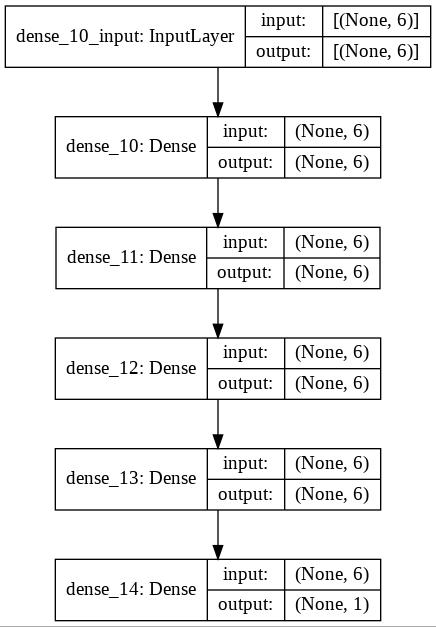

In [ ]:
model = model()
plot_model(model, to_file = 'model.jpg' , show_shapes=True)

In [ ]:
model.fit(x_train2, y_train2, epochs = 1000, verbose=2)

Epoch 1/1000
29/29 - 0s - loss: 0.1325 - mae: 0.2819 - mse: 0.1325
Epoch 2/1000
29/29 - 0s - loss: 0.0242 - mae: 0.1211 - mse: 0.0242
Epoch 3/1000
29/29 - 0s - loss: 0.0150 - mae: 0.0930 - mse: 0.0150
Epoch 4/1000
29/29 - 0s - loss: 0.0135 - mae: 0.0885 - mse: 0.0135
Epoch 5/1000
29/29 - 0s - loss: 0.0133 - mae: 0.0875 - mse: 0.0133
Epoch 6/1000
29/29 - 0s - loss: 0.0132 - mae: 0.0877 - mse: 0.0132
Epoch 7/1000
29/29 - 0s - loss: 0.0131 - mae: 0.0872 - mse: 0.0131
Epoch 8/1000
29/29 - 0s - loss: 0.0131 - mae: 0.0878 - mse: 0.0131
Epoch 9/1000
29/29 - 0s - loss: 0.0130 - mae: 0.0866 - mse: 0.0130
Epoch 10/1000
29/29 - 0s - loss: 0.0129 - mae: 0.0865 - mse: 0.0129
Epoch 11/1000
29/29 - 0s - loss: 0.0130 - mae: 0.0861 - mse: 0.0130
Epoch 12/1000
29/29 - 0s - loss: 0.0130 - mae: 0.0862 - mse: 0.0130
Epoch 13/1000
29/29 - 0s - loss: 0.0129 - mae: 0.0865 - mse: 0.0129
Epoch 14/1000
29/29 - 0s - loss: 0.0128 - mae: 0.0853 - mse: 0.0128
Epoch 15/1000
29/29 - 0s - loss: 0.0129 - mae: 0.0862 - m

In [ ]:
outputTrain = model.predict(x_train2)

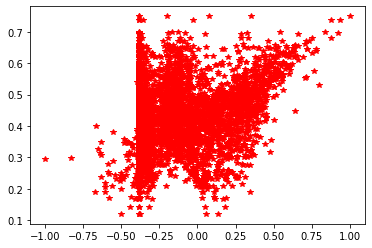

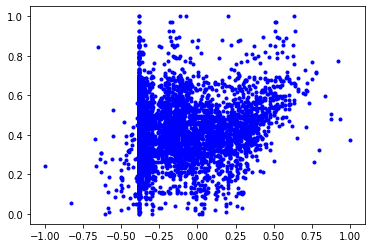

In [ ]:
plt.figure()
plt.plot(x_train2, outputTrain,'*r')
plt.figure()
plt.plot(x_train2,y_train2,'.b')

(908, 1)
(908, 1)
Coeficient:  [[0.48704281]]


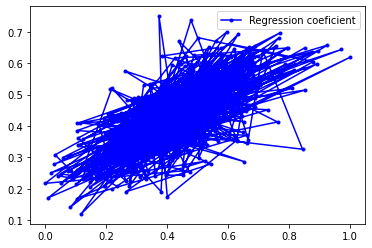

In [ ]:
from sklearn import datasets,linear_model
from sklearn.metrics import mean_absolute_error,r2_score

output = outputTrain
target = np.zeros((908,1))

for i in range(908):
  target[i,0] = y_train2[i]

print(output.shape)
print(target.shape)
#Crear objeto de regresión lineal
regr = linear_model.LinearRegression()

#Entrenar el modelo utilizando training sets
regr.fit(target,output)

#Calcular el coeficiente de regresión
coef = regr.coef_
print('Coeficient: ',coef)

plt.figure()
plt.plot(target,output, '.-b', label = 'Regression coeficient')
plt.legend()
plt.show()